<a href="https://colab.research.google.com/github/KuNNaL2412/PDF_ChatBot/blob/main/PDF_ChatBot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Installing required Dependencies
!pip install -Uqqq pip
!pip install -qqq torch==2.0.1
!pip install -qqq transformers==4.31.0
!pip install -qqq langchain==0.0.266
!pip install -qqq chromadb==0.4.5
!pip install -qqq pypdf==3.15.0
!pip install -qqq xformers==0.0.20
!pip install -qqq sentence_transformers==2.2.2
!pip install -qqq InstructorEmbedding==1.0.1
!pip install -qqq pdf2image==1.16.3
!pip install -qqq streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 16.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.9/116.9 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 24.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 66.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 30.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 59.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.0/90.0 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.3/149.3 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 21.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 6.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... don

In [ ]:
# Downloading AutoGPTQ
!wget -q https://github.com/PanQiWei/AutoGPTQ/releases/download/v0.4.1/auto_gptq-0.4.1+cu118-cp310-cp310-linux_x86_64.whl

In [ ]:
# Installing AutoGPTQ
!pip install -qqq auto_gptq-0.4.1+cu118-cp310-cp310-linux_x86_64.whl

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.2/244.2 kB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.3/519.3 kB 37.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.9/72.9 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 17.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 24.2 MB/s eta 0:00:00


In [ ]:
# Installing Poppler
!sudo apt-get install poppler-utils

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  poppler-utils
0 upgraded, 1 newly installed, 0 to remove and 16 not upgraded.
Need to get 186 kB of archives.
After this operation, 696 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 poppler-utils amd64 22.02.0-2ubuntu0.2 [186 kB]
Fetched 186 kB in 0s (450 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package poppler-utils.
(Reading database ... 120831 

In [ ]:
# Creating a new directory to store PDF's
!mkdir pdfs

In [ ]:
# importing required libraries
import torch
from auto_gptq import AutoGPTQForCausalLM
from langchain import HuggingFacePipeline, PromptTemplate
from langchain.chains import RetrievalQA
from langchain.document_loaders import PyPDFDirectoryLoader
from langchain.embeddings import HuggingFaceInstructEmbeddings
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.vectorstores import Chroma
from pdf2image import convert_from_path
from transformers import AutoTokenizer, TextStreamer, pipeline
import streamlit as st

DEVICE = "cuda:0" if torch.cuda.is_available() else "cpu"

Upload your pdf files inside the pdfs folder generated

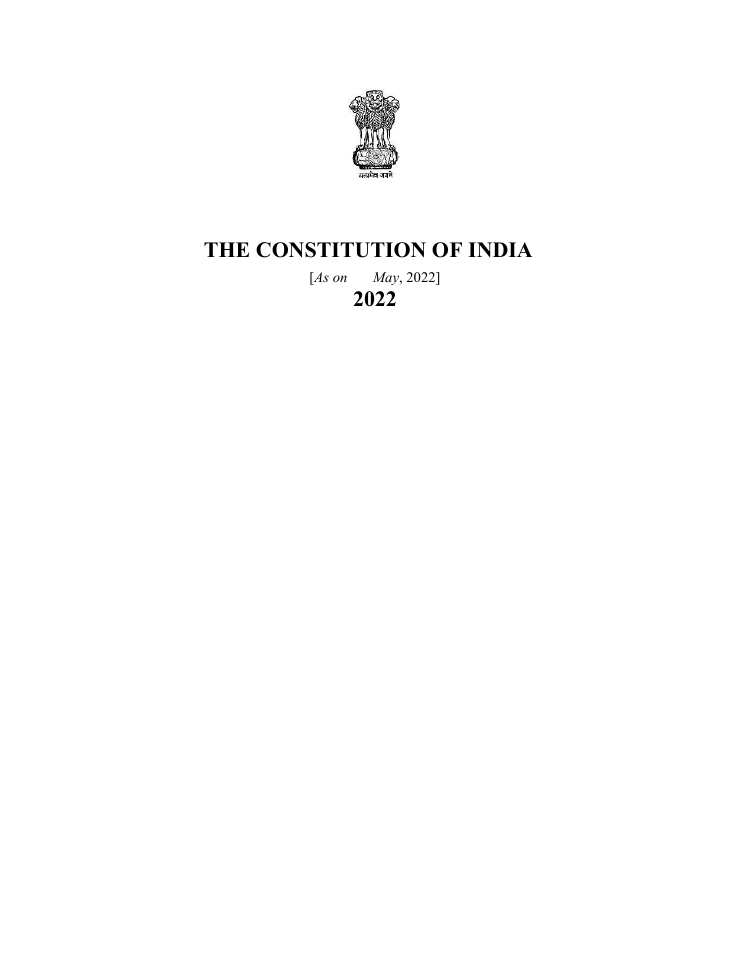

In [ ]:
# add path of the 1st pdf file to view the images of the pdf converted
# pdf_images = convert_from_path("ENTER YOUR FILE PATH", dpi=88)

pdf_images = convert_from_path("/content/pdfs/constitution_india.pdf", dpi=88)
pdf_images[0]

In [ ]:
# add path of the 2nd pdf file

# pdf_images2 = convert_from_path("Enter Your File Path", dpi=88)
# pdf_images2[0]

In [ ]:
# Removing Existing "db" directory if present
!rm -rf "db"

In [ ]:
# Loading "pdf" directory
loader = PyPDFDirectoryLoader("pdfs")
docs = loader.load()
len(docs)

404

In [ ]:
# Using hkunlp embeddings from HuggingFace
embeddings = HuggingFaceInstructEmbeddings(
    model_name="hkunlp/instructor-large", model_kwargs={"device": DEVICE}
)

load INSTRUCTOR_Transformer
max_seq_length  512


In [ ]:
# Splitting pdf extracted text into small chunks
text_splitter = RecursiveCharacterTextSplitter(chunk_size=1024, chunk_overlap=64)
texts = text_splitter.split_documents(docs)
len(texts)

1096

In [ ]:
%%time
db = Chroma.from_documents(texts, embeddings, persist_directory="db")

CPU times: user 1min 14s, sys: 1.68 s, total: 1min 16s
Wall time: 1min 36s


In [ ]:
# Using Llama 2 Chat GPTQ Model
model_name_or_path = "TheBloke/Llama-2-13B-chat-GPTQ"
model_basename = "model"

tokenizer = AutoTokenizer.from_pretrained(model_name_or_path, use_fast=True)

model = AutoGPTQForCausalLM.from_quantized(
    model_name_or_path,
    revision="gptq-4bit-128g-actorder_True",
    model_basename=model_basename,
    use_safetensors=True,
    trust_remote_code=True,
    inject_fused_attention=False,
    device=DEVICE,
    quantize_config=None,
)

In [ ]:
# Creating Default system prompt
DEFAULT_SYSTEM_PROMPT = """
You are a helpful, respectful and honest assistant. Always answer as helpfully as possible, while being safe. Your answers should not include any harmful, unethical, racist, sexist, toxic, dangerous, or illegal content. Please ensure that your responses are socially unbiased and positive in nature.

If a question does not make any sense, or is not factually coherent, explain why instead of answering something not correct. If you don't know the answer to a question, please don't share false information.
""".strip()


def generate_prompt(prompt: str, system_prompt: str = DEFAULT_SYSTEM_PROMPT) -> str:
    return f"""
[INST] <<SYS>>
{system_prompt}
<</SYS>>

{prompt} [/INST]
""".strip()

In [ ]:
streamer = TextStreamer(tokenizer, skip_prompt=True, skip_special_tokens=True)

In [ ]:
text_pipeline = pipeline(
    "text-generation",
    model=model,
    tokenizer=tokenizer,
    max_new_tokens=1024,
    temperature=0,
    top_p=0.95,
    repetition_penalty=1.15,
    streamer=streamer,
)

The model 'LlamaGPTQForCausalLM' is not supported for text-generation. Supported models are ['BartForCausalLM', 'BertLMHeadModel', 'BertGenerationDecoder', 'BigBirdForCausalLM', 'BigBirdPegasusForCausalLM', 'BioGptForCausalLM', 'BlenderbotForCausalLM', 'BlenderbotSmallForCausalLM', 'BloomForCausalLM', 'CamembertForCausalLM', 'CodeGenForCausalLM', 'CpmAntForCausalLM', 'CTRLLMHeadModel', 'Data2VecTextForCausalLM', 'ElectraForCausalLM', 'ErnieForCausalLM', 'FalconForCausalLM', 'GitForCausalLM', 'GPT2LMHeadModel', 'GPT2LMHeadModel', 'GPTBigCodeForCausalLM', 'GPTNeoForCausalLM', 'GPTNeoXForCausalLM', 'GPTNeoXJapaneseForCausalLM', 'GPTJForCausalLM', 'LlamaForCausalLM', 'MarianForCausalLM', 'MBartForCausalLM', 'MegaForCausalLM', 'MegatronBertForCausalLM', 'MusicgenForCausalLM', 'MvpForCausalLM', 'OpenLlamaForCausalLM', 'OpenAIGPTLMHeadModel', 'OPTForCausalLM', 'PegasusForCausalLM', 'PLBartForCausalLM', 'ProphetNetForCausalLM', 'QDQBertLMHeadModel', 'ReformerModelWithLMHead', 'RemBertForCausal

In [ ]:
# Using HuggingFace Pipeline
llm = HuggingFacePipeline(pipeline=text_pipeline, model_kwargs={"temperature": 0})

In [ ]:
SYSTEM_PROMPT = "Use the following pieces of context to answer the question at the end. If you don't know the answer, just say that you don't know, don't try to make up an answer."

template = generate_prompt(
    """
{context}

Question: {question}
""",
    system_prompt=SYSTEM_PROMPT,
)

In [ ]:
prompt = PromptTemplate(template=template, input_variables=["context", "question"])

In [ ]:
# Creating a chain for using similar context question answering
qa_chain = RetrievalQA.from_chain_type(
    llm=llm,
    chain_type="stuff",
    retriever=db.as_retriever(search_kwargs={"k": 2}),
    return_source_documents=True,
    chain_type_kwargs={"prompt": prompt},
)

In [ ]:
# Result no - 1
result = qa_chain("What is the Power of the President")

 Based on the context provided, the power of the President as stated in the Constitution of India includes:

1. The power to grant pardons, reprieves, and remissions of punishment in certain cases (Article 72).
2. The power to suspend, remit, or commute sentences in certain cases (Article 72).
3. The power to promulgate Ordinances during the recess of Parliament, if he is satisfied that circumstances exist which render it necessary for him to take immediate action (Article 123).

However, it is important to note that the constitution also places limits on the President's powers, such as the requirement that all legislative powers be exercised by or under the authority of the Legislature (Article 122), and that the validity of any proceedings in Parliament shall not be called into question on grounds of alleged irregularity of procedure (Article 122).


In [ ]:
# Source of the result
print(result["source_documents"][0].page_content)

into and decided by the Supreme Court whose decision shall be final. 
(2) If the election of a person as President or Vice-President is declared 
void by the Supreme Court, acts done by him in the exercise and performance 
of the powers and duties of the office of President or Vice-President, as the 
case may be, on or before the date of the decision of the Supreme Court shall 
not be invalidated by reason of that declaration. 
(3) Subject to the provisions of this Constitution, Parliament may by law 
regulate any matter relating to or connected with the election of a President or 
Vice-President. 
(4) The election of a person as President or Vice-President shall not be 
called in question on the ground of the existence of any vacancy for whatever 
reason among the members of the electoral college electing him.] 
72. Power of President to grant pardons, etc., and to suspend, remit 
or commute sentences in certain cases. —(1) The President shall have the


In [ ]:
# Result no - 2
result = qa_chain("What is the right of equality")

 Based on the provided text, the right of equality is mentioned in Article 16 of the Constitution of India, which states that there shall be equality of opportunity for all citizens in matters relating to employment or appointment to any office under the state. Additionally, no citizen shall be ineligible for or discriminated against in respect of any employment or office under the state on grounds only of religion, race, caste, sex, descent, place of birth, residence, or any of them.


In [ ]:
# Result no - 3
result = qa_chain("What are the Qualifications for election as President.")

 Based on the context provided, I can answer your question. According to Article 58 of the Constitution of India, a person must meet the following qualifications to be eligible for election as President:

1. They must be a citizen of India.
2. They must have completed the age of thirty-five years.
3. They must be qualified for election as a member of the House of the People (i.e., the Lok Sabha).

Additionally, the Explanation to Article 58 states that a person shall not be deemed to hold any office of profit by reason only that they are the President or Vice-President of the Union or the Governor of any State or are a Minister.
